In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [35]:
base_dir = "PetImages"

train_datagen = image_dataset_from_directory(
    base_dir,
    validation_split=0.15,
    subset='training',
    seed=123,
    image_size=(200, 200),
    batch_size=32
)

test_datagen = image_dataset_from_directory(
    base_dir,
    validation_split=0.15,
    subset='validation',
    seed=123,
    image_size=(200, 200),
    batch_size=32
)

Found 24991 files belonging to 2 classes.
Using 21243 files for training.
Found 24991 files belonging to 2 classes.
Using 3748 files for validation.


In [39]:
import keras
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(200, 200, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(200, 200, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,684,801 (25.50 MB)

 Trainable params: 6,684,801 (25.50 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=10
)

Epoch 1/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 107s 74ms/step - accuracy: 0.5440 - loss: 0.6878 - val_accuracy: 0.5459 - val_loss: 0.6799
Epoch 2/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 46s 69ms/step - accuracy: 0.6615 - loss: 0.6140 - val_accuracy: 0.7268 - val_loss: 0.5424
Epoch 3/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.7185 - loss: 0.5502 - val_accuracy: 0.7609 - val_loss: 0.4868
Epoch 4/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - accuracy: 0.7588 - loss: 0.4919 - val_accuracy: 0.8031 - val_loss: 0.4299
Epoch 5/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.7909 - loss: 0.4520 - val_accuracy: 0.8175 - val_loss: 0.4075
Epoch 6/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 81s 68ms/step - accuracy: 0.8084 - loss: 0.4144 - val_accuracy: 0.8234 - val_loss: 0.3837
Epoch 7/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.8251 - loss: 0.3886 - val_accuracy: 0.8404 - val_loss: 0.3613
Epoch 8/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.8354 - loss: 0.3644 -

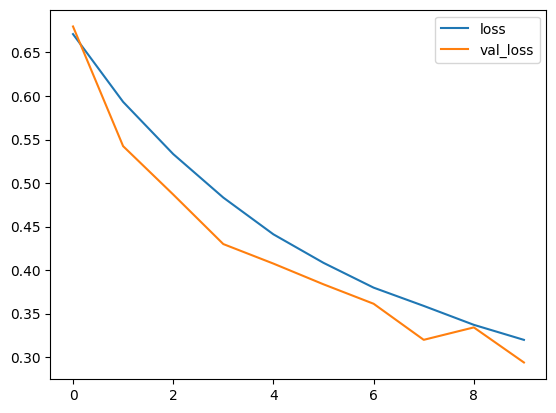

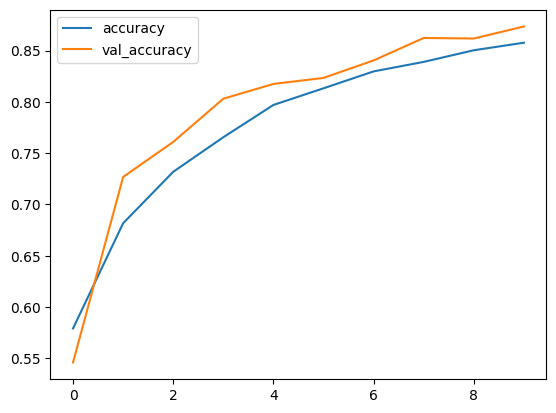

In [42]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [43]:
model.save('model.keras')